In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

C:\Users\haydencordeiro\AppData\Local\Temp\ipykernel_20960\2424261827.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the dataset
data = pd.read_excel('./data/population_ghi_unemploment_yearwise_import export_africa_sheet.xlsx')  # Replace 'your_dataset.csv' with the actual filename

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['GHI', 'Year'])
y = data['GHI']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MSE  0.3523621717961282


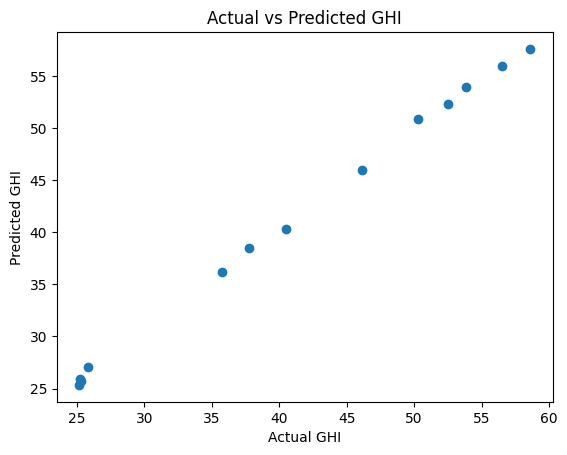

In [4]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE ",mse)

#  Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual GHI")
plt.ylabel("Predicted GHI")
plt.title("Actual vs Predicted GHI")
plt.show()

In [11]:
X_test.iloc[0].values

array([1.34712554e+09, 1.01477941e+01, 1.94925000e+01, 8.40175000e+00,
       7.94200000e+01, 2.29330000e+02, 4.66100000e+02, 4.81621775e+07,
       6.41299440e+07, 6.22900000e+01, 7.36849065e+04, 1.28000000e+00])

In [12]:
new_data = [[ 277118493, 9.481062, 15.990643, 5.855937, 83.75495, 43.362054, -113.816669, -4.28E+07, -5.50E+07, 0.597, -121248.9015, -0.38255]]


predicted_GHI = model.predict(new_data)

print("Predicted GHI:", predicted_GHI)

Predicted GHI: [57.57731279]


c:\Users\haydencordeiro\Desktop\ADT project\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [10]:
data.corr()

,Year,Population,GHI,Unemployment Above age 15,Unemployment between age 15-24,Unemployment Above age 25+,Share of agricultural land in South Africa 2000-2020 in percentage,People employed in agricultural sector in millions,Total employment in Africa 2010-2021(In Millions),Import (US$ Thousand),Export (US$ Thousand)
Year,1.000000,0.981913,-0.994264,-0.193297,0.917718,0.909095,-0.993367,0.929906,0.999922,0.967924,0.969089
Population,0.981913,1.000000,-0.987226,-0.211167,0.900627,0.895042,-0.978893,0.970204,0.981442,0.969889,0.976929
GHI,-0.994264,-0.987226,1.000000,0.264706,-0.891739,-0.875912,0.997638,-0.946740,-0.994189,-0.984619,-0.984679
Unemployment Above age 15,-0.193297,-0.211167,0.264706,1.000000,0.186129,0.213073,0.272233,-0.225990,-0.195552,-0.370512,-0.340313
Unemployment between age 15-24,0.917718,0.900627,-0.891739,0.186129,1.000000,0.978139,-0.885708,0.859892,0.916598,0.830140,0.846326
Unemployment Above age 25+,0.909095,0.895042,-0.875912,0.213073,0.978139,1.000000,-0.868016,0.854808,0.908053,0.809510,0.829016
Share of agricultural land in South Africa 2000-2020 in percentage,-0.993367,-0.978893,0.997638,0.272233,-0.885708,-0.868016,1.000000,-0.933312,-0.993377,-0.984519,-0.981903
People employed in agricultural sector in millions,0.929906,0.970204,-0.946740,-0.225990,0.859892,0.854808,-0.933312,1.000000,0.929572,0.950471,0.968440
Total employment in Africa 2010-2021(In Millions),0.999922,0.981442,-0.994189,-0.195552,0.916598,0.908053,-0.993377,0.929572,1.000000,0.967993,0.969450
Import (US$ Thousand),0.967924,0.969889,-0.984619,-0.370512,0.830140,0.809510,-0.984519,0.950471,0.967993,1.000000,0.995154


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 0.4814662688246906
Mean Squared Error: 0.3523621717961282
Root Mean Squared Error: 0.5936010207168854
R-squared Score: 0.9976773592192235


c:\Users\haydencordeiro\Desktop\ADT project\venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']